# DATA 602 Intro to Data Analysis and Machine Learning

## Project by Gowtham Karaka, Venkat Akhil Mothe

# Digit Classification

**Instructions:**

The objective is to identify each of a large set of binary images as one of the digits from 0 to 9. Each character has 200 instances (a total of 2000 instances) and each sample is described with 298 attributes. So your features are not pixels but these attributes.

These attributes come in separate files:
1. mfeat-fou: 76 Fourier coefficients of the character shapes;
2. mfeat-fac: 216 profile correlations;
3. mfeat-mor: 6 morphological features

You can download the dataset (attributes) as follows:

## DATA

In [1]:
!git clone https://github.com/cvrg-iyte/DATA602repo.git
import pandas as pd
data1 = pd.read_csv("./DATA602repo/mfeat-fou", header=None, delim_whitespace=True)
data2 = pd.read_csv("./DATA602repo/mfeat-fac", header=None, delim_whitespace=True)
data3 = pd.read_csv("./DATA602repo/mfeat-mor", header=None, delim_whitespace=True)

fatal: destination path 'DATA602repo' already exists and is not an empty directory.


You have a total of 298 features when you merge 3 files. There is not any specific column for target variable. In each file, first 200 samples are of class 0, followed by sets of 200 samples for each of the classes 1 to 9. Please create your target variable (y) first.

You will build a ML system to predict which digit is a given sample. You are supposed to try different classification methods and apply best practices we have seen in the lectures such as grid search, cross validation, regularization etc.

In [2]:
# remove warnings

import warnings

warnings.filterwarnings('ignore')


In [3]:
# Importing all necessary libraries

import pandas as pd                                                 # Import pandas for data manipulation and analysis
import numpy as np                                                  # Import numpy for numerical operations
import seaborn as sns                                               # Import seaborn for statistical data visualization
import matplotlib.pyplot as plt                                     # Import matplotlib.pyplot for creating visualizations
from sklearn.model_selection import StratifiedShuffleSplit          # Import StratifiedShuffleSplit for creating stratified train/test splits
from sklearn.linear_model import LogisticRegression                 # Import LogisticRegression for logistic regression modeling
from sklearn.model_selection import StratifiedKFold                 # Import StratifiedKFold for stratified k-fold cross-validation
from sklearn.model_selection import cross_val_score                 # Import cross_val_score for cross-validation scoring
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay# Import confusion_matrix, ConfusionMatrixDisplay for confusion matrix analysis
from sklearn.metrics import precision_score                         # Import precision_score for precision metric calculation
from sklearn.metrics import classification_report                   # Import classification_report for detailed classification metrics
from sklearn.svm import SVC                                         # Import SVC for Support Vector Classification
from sklearn.ensemble import RandomForestClassifier                 # Import RandomForestClassifier for random forest classification
from sklearn.tree import DecisionTreeClassifier, plot_tree          # Import DecisionTreeClassifier for decision tree classification
from sklearn.model_selection import GridSearchCV                    # Import GridSearchCV for hyperparameter tuning using grid search
from sklearn.metrics import accuracy_score                          # Import accuracy_score for accuracy metric calculation
from sklearn.metrics import f1_score                                # Import f1_score for F1 score metric calculation
from sklearn.metrics import recall_score                            # Import recall_score for recall metric calculation



In [4]:
data1

#This is to display the 1st dataframe
#It contains 2000 rows and 76 columns.
#The attributes here are fourier coefficents of the character shapes.

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,...,0.108996,0.197440,0.197778,0.205866,0.138887,0.160848,0.126190,0.247345,0.239117,0.136807
1996,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,...,0.212160,0.161606,0.033621,0.173155,0.295227,0.259417,0.345691,0.068303,0.158352,0.282327
1997,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,...,0.236628,0.121659,0.316333,0.244846,0.132893,0.042988,0.250740,0.141576,0.038776,0.114591
1998,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,...,0.155442,0.168154,0.147167,0.268675,0.199125,0.128708,0.285220,0.230322,0.103664,0.130003


In [5]:
data1.head() 

#This is to display the head of 1st data frame also known as the first 5 rows.

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [6]:
data2 

#This is to display the 2nd dataframe.
#It contains 2000 rows and 216 columns.
#The attributes here are profile correlations.

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,304,242,927,626,564,674,25,17,0,7,...,912,507,577,757,15,24,11,14,10,18
1996,324,330,919,713,609,693,28,16,8,9,...,898,554,620,632,12,25,11,10,12,17
1997,337,299,852,724,581,660,22,14,10,10,...,841,579,590,681,18,27,13,15,17,21
1998,247,261,866,633,565,615,24,15,2,4,...,839,498,556,706,16,26,13,13,15,15


In [7]:
data2.head()   

#This is to display the head of 2nd dataframe.

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


In [8]:
data3       

#This is to display the 3rd dataframe.
#It contains 2000 rows and 6 columns.
#The attributes here are morphological features.

,0,1,2,3,4,5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...
1995,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,1.0,1.0,1.0,142.926861,1.426381,4118.327320


In [9]:
data3.head()      

#This is to display the head of 3rd dataframe.

,0,1,2,3,4,5
0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,1.0,0.0,0.0,127.262861,1.329637,1647.720235


In [10]:
merged_df = pd.concat([data1, data2, data3], axis=1)

# Concatenate DataFrames horizontally
# The no of rows are kept constant but there is an increase in the no of columns.
# The data sets are concatenated horizantally.

merged_df
# This is to display the merged DataFrame

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,0,1,2,3,4,5
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,8,15,12,13,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,11,13,15,11,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,16,14,13,6,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,7,12,15,9,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,10,15,13,13,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,...,11,14,10,18,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,...,11,10,12,17,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,...,13,15,17,21,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,...,13,13,15,15,1.0,1.0,1.0,142.926861,1.426381,4118.327320


In [11]:
merged_df.columns = range(merged_df.shape[1])

# Display the updated DataFrame
merged_df

#The merged dataframe has 2000 rows and 298 columns.

,0,1,2,3,4,5,6,7,8,9,...,288,289,290,291,292,293,294,295,296,297
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,8,15,12,13,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,11,13,15,11,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,16,14,13,6,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,7,12,15,9,1.0,0.0,0.0,129.478861,1.270878,1695.055281
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,10,15,13,13,1.0,0.0,0.0,127.262861,1.329637,1647.720235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,...,11,14,10,18,1.0,1.0,1.0,157.498861,1.655794,5326.025889
1996,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,...,11,10,12,17,1.0,1.0,1.0,152.404861,1.620345,5243.267754
1997,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,...,13,15,17,21,1.0,1.0,1.0,134.672861,1.541987,3766.763222
1998,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,...,13,13,15,15,1.0,1.0,1.0,142.926861,1.426381,4118.327320


In [12]:

# Create target variable (y) as described in the objective

samples_per_class = 200
num_classes = 10
y = np.concatenate([np.full(samples_per_class, i) for i in range(num_classes)])

# Add the target variable as a new column to df_combined
merged_df['target'] = y

# Display the updated DataFrame
merged_df


,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,target
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,15,12,13,1.0,0.0,0.0,133.150861,1.311693,1620.221779,0
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,13,15,11,1.0,0.0,0.0,126.724861,1.302745,1609.334822,0
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,14,13,6,1.0,0.0,0.0,131.173861,1.319031,1568.978435,0
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,12,15,9,1.0,0.0,0.0,129.478861,1.270878,1695.055281,0
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,15,13,13,1.0,0.0,0.0,127.262861,1.329637,1647.720235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.171874,0.221525,0.426470,0.077220,0.264413,0.220274,0.452574,0.161113,0.356788,0.081889,...,14,10,18,1.0,1.0,1.0,157.498861,1.655794,5326.025889,9
1996,0.152025,0.347439,0.323534,0.087706,0.427077,0.313656,0.371549,0.262768,0.396422,0.124391,...,10,12,17,1.0,1.0,1.0,152.404861,1.620345,5243.267754,9
1997,0.335606,0.318426,0.257948,0.225381,0.417769,0.123067,0.333455,0.342044,0.398151,0.079550,...,15,17,21,1.0,1.0,1.0,134.672861,1.541987,3766.763222,9
1998,0.253910,0.171202,0.302622,0.181066,0.326383,0.167960,0.417409,0.399065,0.266153,0.097131,...,13,15,15,1.0,1.0,1.0,142.926861,1.426381,4118.327320,9


In [13]:
merged_df.head()    #Displaying the head of merged_df 

,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,target
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,15,12,13,1.0,0.0,0.0,133.150861,1.311693,1620.221779,0
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,13,15,11,1.0,0.0,0.0,126.724861,1.302745,1609.334822,0
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,14,13,6,1.0,0.0,0.0,131.173861,1.319031,1568.978435,0
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,12,15,9,1.0,0.0,0.0,129.478861,1.270878,1695.055281,0
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,15,13,13,1.0,0.0,0.0,127.262861,1.329637,1647.720235,0


In [14]:
merged_df.shape       #Displaying the shape of merged dataframe

(2000, 299)

## EDA

In [15]:
# To check if there are any null values in the entire DataFrame
any_null = merged_df.isnull().any().any()

# Display the result
print(any_null)

False


In [16]:
merged_df.isnull().sum()         #The sum of all null values in merged df

0         0
1         0
2         0
3         0
4         0
         ..
294       0
295       0
296       0
297       0
target    0
Length: 299, dtype: int64

There are no null values.

Performing EDA :Exploratory Data Analysis

Finding the correlation between different columns in the data set

Since the data set is about digit classification to observe the characterstics, we perform some analysis

Correlation


<Axes: >

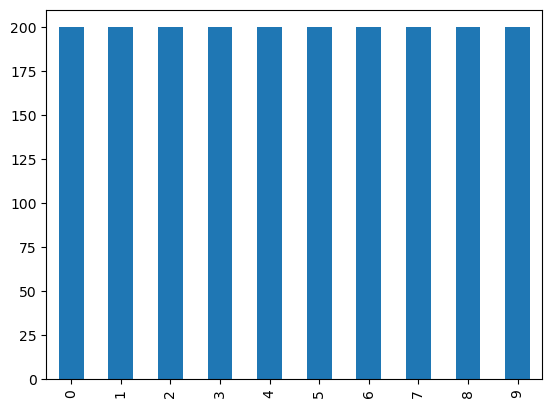

In [17]:
# visualization
merged_df.target.value_counts().plot(kind = 'bar')

## Correlation

In [18]:
#Printing correlation matrix for DataFrame
correlation_matrix = merged_df.corr()
correlation_matrix


,0,1,2,3,4,5,6,7,8,9,...,289,290,291,292,293,294,295,296,297,target
0,1.000000,0.195455,0.432445,-0.054397,-0.130640,0.141651,-0.179721,0.635559,-0.318396,-0.069239,...,-0.031993,-0.078624,0.396518,-0.083354,0.147692,0.080145,-0.013492,0.071568,-0.008874,0.445994
1,0.195455,1.000000,0.240622,0.401632,-0.331516,0.354433,-0.184539,0.181393,-0.057488,0.258610,...,-0.375747,-0.229271,0.031458,-0.788562,0.690865,-0.371993,0.386326,0.467335,0.439095,-0.282879
2,0.432445,0.240622,1.000000,-0.230862,0.045627,0.191618,-0.275318,0.562596,-0.311993,0.093156,...,-0.044015,-0.165187,-0.001919,-0.389145,0.384617,-0.119661,0.094375,0.205497,0.131957,0.167041
3,-0.054397,0.401632,-0.230862,1.000000,-0.190518,-0.031723,-0.247865,-0.251078,-0.027279,0.026560,...,-0.133778,-0.042176,-0.085600,-0.167418,0.105285,-0.146075,-0.135297,-0.110989,-0.127869,-0.290150
4,-0.130640,-0.331516,0.045627,-0.190518,1.000000,-0.325107,0.179689,-0.003781,0.208964,0.109111,...,0.257269,0.072272,-0.267165,0.149430,-0.253970,-0.138200,-0.296703,-0.268711,-0.292295,-0.131924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.080145,-0.371993,-0.119661,-0.146075,-0.138200,0.086331,0.153280,0.011456,0.010155,0.161655,...,-0.032515,0.077657,-0.020152,0.516263,-0.001067,1.000000,-0.143836,-0.164682,-0.119757,0.485343
295,-0.013492,0.386326,0.094375,-0.135297,-0.296703,0.508874,0.173529,0.120494,-0.000190,0.385462,...,-0.140343,-0.169249,0.289905,-0.609249,0.616539,-0.143836,1.000000,0.937760,0.972610,-0.116933
296,0.071568,0.467335,0.205497,-0.110989,-0.268711,0.542437,0.129338,0.218290,-0.021429,0.402119,...,-0.154319,-0.272943,0.330168,-0.666205,0.674785,-0.164682,0.937760,1.000000,0.948821,-0.059369
297,-0.008874,0.439095,0.131957,-0.127869,-0.292295,0.541863,0.207862,0.146556,0.030817,0.432086,...,-0.190627,-0.173406,0.258161,-0.666857,0.702786,-0.119757,0.972610,0.948821,1.000000,-0.108430


In [19]:

# Ignoring the diagnol from correlation matrix 
np.fill_diagonal(correlation_matrix.values, np.nan)

# Sort features by absolute correlation with the target
target_correlations = correlation_matrix["target"].abs().sort_values(ascending=False)



In [20]:
target_correlations    #Displaying the target correlations

294       0.485343
0         0.445994
292       0.431143
75        0.357880
245       0.348355
            ...   
287       0.006086
229       0.003994
82        0.003098
133       0.002131
target         NaN
Name: target, Length: 299, dtype: float64

In [21]:
# Set a threshold to select top features
threshold = 0.4
top_features = target_correlations[target_correlations > threshold].index.tolist()


In [22]:
top_features        #Displaying the top features

[294, 0, 292]

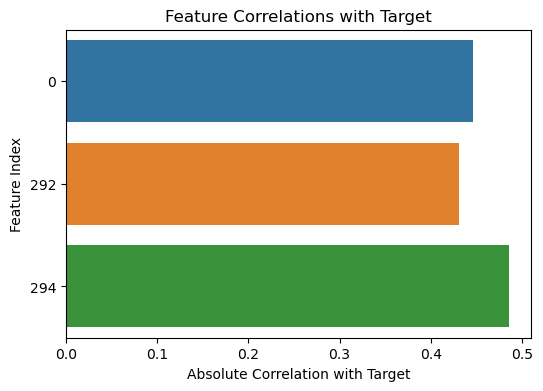

In [23]:
# Visualize correlations
plt.figure(figsize=(6, 4))

# Check if light_vals is not empty
if len(top_features) > 0:
    sns.barplot(x=target_correlations[top_features].values, y=top_features, orient="h")
    plt.title("Feature Correlations with Target")
    plt.xlabel("Absolute Correlation with Target")
    plt.ylabel("Feature Index")
    plt.show()
else:
    print("No features selected based on the threshold.")

# Train-Test

In [24]:
y = merged_df.iloc[:, -1]  #Target variable
x = merged_df.iloc[:, :-1] #Features

In [25]:
# Use StratifiedShuffleSplit for stratified splitting
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Splitting the data into testing and training 
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]     
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# LOGISTIC REGRESSION

In [26]:

#Initialize Logistic Regression model for multi-class classification
logreg=LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train,y_train)  #Train the model      


# Predictions on test and train sets
test_pred = logreg.predict(x_test)
train_pred = logreg.predict(x_train)



In [27]:
# Define cross-validation strategy (Stratified K-Fold with 5 splits)

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
lr_cv_scores = cross_val_score(logreg, x_train, y_train, cv=cv_strategy, scoring='accuracy')

# Display the cross-validation scores
print("Logistic Regression Cross-Validation Scores:", lr_cv_scores)
print("Mean Accuracy:", lr_cv_scores.mean())


Logistic Regression Cross-Validation Scores: [0.96071429 0.975      0.96428571 0.94285714 0.92142857]
Mean Accuracy: 0.9528571428571428


<Figure size 600x400 with 0 Axes>

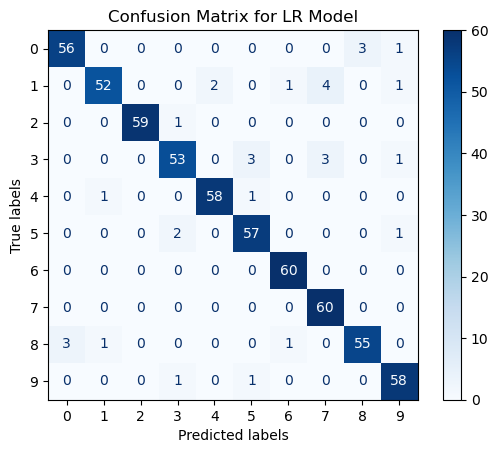

In [28]:
# As y_test and test_pred are true and predicted labels
# Calculate confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for LR Model')
plt.show()

In [29]:

precision_score(y_test,test_pred, average='weighted')

# 'weighted' takes into account the imbalance in the number of samples for each class

0.9474985628695978

In [30]:

recall_score(y_test, test_pred, average='weighted')  # Calculate recall score with weighted averaging for the specified model


0.9466666666666667

In [31]:

f1_score(y_test, test_pred, average='weighted')  # Calculate F1 score with weighted averaging for the specified model


0.9463641122258337

In [32]:

test_accuracy = accuracy_score(y_test, test_pred)  # Calculate and print the test accuracy for the specified model
print('Test Accuracy:', test_accuracy)


Test Accuracy: 0.9466666666666667


## Regularization

In [33]:
# Instantiate Logistic Regression model for multi-class classification

lr = LogisticRegression(max_iter=1000)

# Define hyperparameters for grid search
penalty = ['l1', 'l2']
c_range = [0.001, 0.01, 0.1, 1]
solver = ['liblinear']  # For 'l1' penalty, 'liblinear' solver should be used
parameters_lr = dict(C=c_range, penalty=penalty, solver=solver)



In [34]:
# TO Create a  GridSearchCV object for hyperparameter tuning.
lr_grid = GridSearchCV(lr, parameters_lr, scoring='accuracy', cv=3, verbose=1)

# Training model and predicting on test set
lr_grid.fit(x_train, y_train)

# This is to find the best parameters using GridSearch approach
print("The Best parameters obtained through GridSearch:", lr_grid.best_params_)

# This is the usage of the Best estimator model
best_lr_model = lr_grid.best_estimator_



Fitting 3 folds for each of 8 candidates, totalling 24 fits
The Best parameters obtained through GridSearch: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [35]:
# This is to test the best model on the test set
test_accuracy_after = best_lr_model.score(x_test, y_test)
print("The Accuracy obtained on test set:", test_accuracy_after)

The Accuracy obtained on test set: 0.9816666666666667


After performing Regularization we increased the performance of the model.

In [36]:

# Calculate Metrics
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')
test_accuracy = accuracy_score(y_test, test_pred)
after_regularization = test_accuracy_after


# Table Comparison
lin_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Test Accuracy','After Regularization'],
    'Your Model': [precision, recall, f1, test_accuracy,after_regularization]
}

lin_df = pd.DataFrame(lin_data)
print(lin_df)


                 Metric  Your Model
0             Precision    0.947499
1                Recall    0.946667
2              F1 Score    0.946364
3         Test Accuracy    0.946667
4  After Regularization    0.981667


## Decision Trees

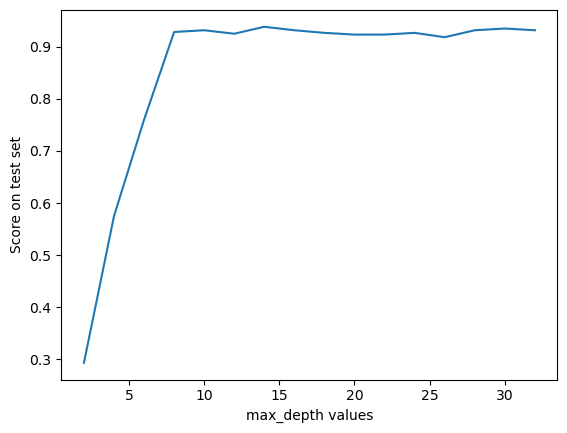

In [37]:

mdepths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]  # List of max_depth values to explore
errors = np.zeros(16)  # Initialize an array to store errors
index = 0  # Initialize an index variable

# Loop over different max_depth values
for d in mdepths:
    tree_class = DecisionTreeClassifier(max_depth=d, min_samples_split=5)  # Initialize DecisionTreeClassifier with specified max_depth and min_samples_split
    tree_class.fit(x_train, y_train)  # Train the model on the training set
    u = tree_class.score(x_test, y_test)  # Evaluate the model on a separate test set and calculate the accuracy
    errors[index] = u  # Store the accuracy in the errors array
    index += 1  # Increment the index

x = np.array(range(0, 16))  # Create an array for x-axis values
plt.plot(mdepths, errors)  # Plot max_depth values against errors
plt.xlabel('max_depth values')  # Label for the x-axis
plt.ylabel('Score on test set')  # Label for the y-axis
plt.show()  # Display the plot

From graph we can see that after '10' the testing score is not changing much. So, take max_depth_value = 10

In [38]:


d_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)  # Initialize DecisionTreeClassifier with entropy criterion and max depth of 10

d_tree.fit(x_train, y_train)  # Train DecisionTreeClassifier on the training data

d_tree_test_pred = d_tree.predict(x_test)  # Make predictions on the test set
d_tree_train_pred = d_tree.predict(x_train)  # Make predictions on the training set

d_tree_probabs = d_tree.predict_proba(x_test)  # Get class probabilities for the test set
pos_probabs = d_tree_probabs[:, 1]  # Extract probabilities for the positive class (class 1)


<Figure size 600x400 with 0 Axes>

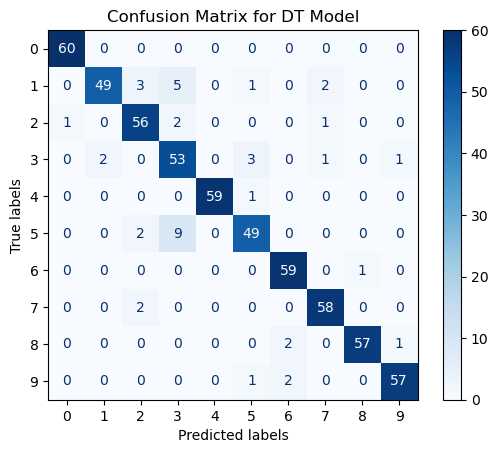

In [39]:


# As y_test and y_pred_knn are true and predicted labels
# Calculate confusion matrix
cm = confusion_matrix(y_test, d_tree_test_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for DT Model')
plt.show()

Top 10 Features:
Feature 2: 0.020506644435927864
Feature 94: 0.03974240464435315
Feature 76: 0.05027053283188898
Feature 184: 0.05804379642854694
Feature 294: 0.058265655104037146
Feature 73: 0.06722646222067366
Feature 256: 0.08428973785657418
Feature 297: 0.11149577476529353
Feature 293: 0.11160610337213955
Feature 292: 0.27132546468037255


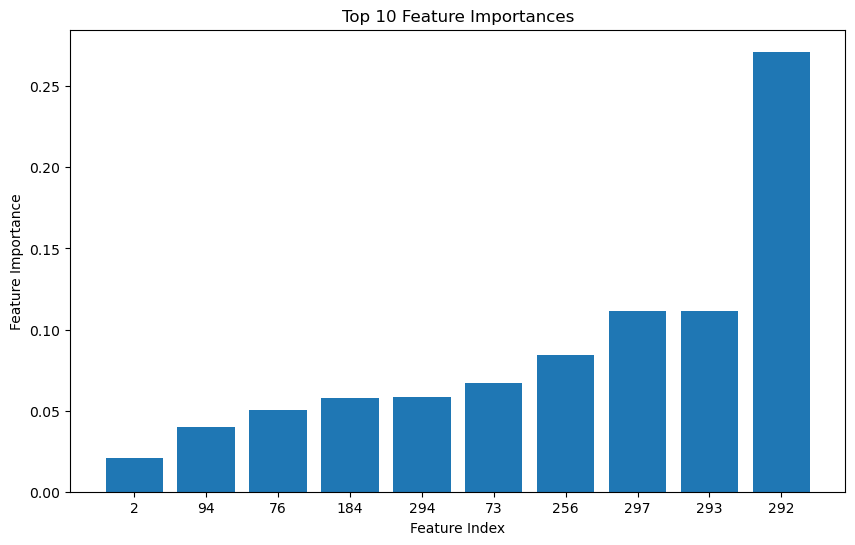

In [40]:


# Assuming x_train is the feature variable
# Assuming y_train is the target variable

# Initialize Decision Tree classifier
d_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)

# Train the Decision Tree classifier on the training data
d_tree.fit(x_train, y_train)

# Extract feature importances
feature_importances = d_tree.feature_importances_

# Get indices of the top 10 features
top_10_indices = np.argsort(feature_importances)[-10:]

# Print or use the top 10 feature importances
print("Top 10 Features:")
for i in top_10_indices:
    print(f"Feature {i}: {feature_importances[i]}")

# Plotting the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_indices)), feature_importances[top_10_indices], align='center')
plt.xticks(range(len(top_10_indices)), top_10_indices)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Top 10 Feature Importances')
plt.show()


So from the above features we can categorize the features 292,293 and 297 are the most important features of all

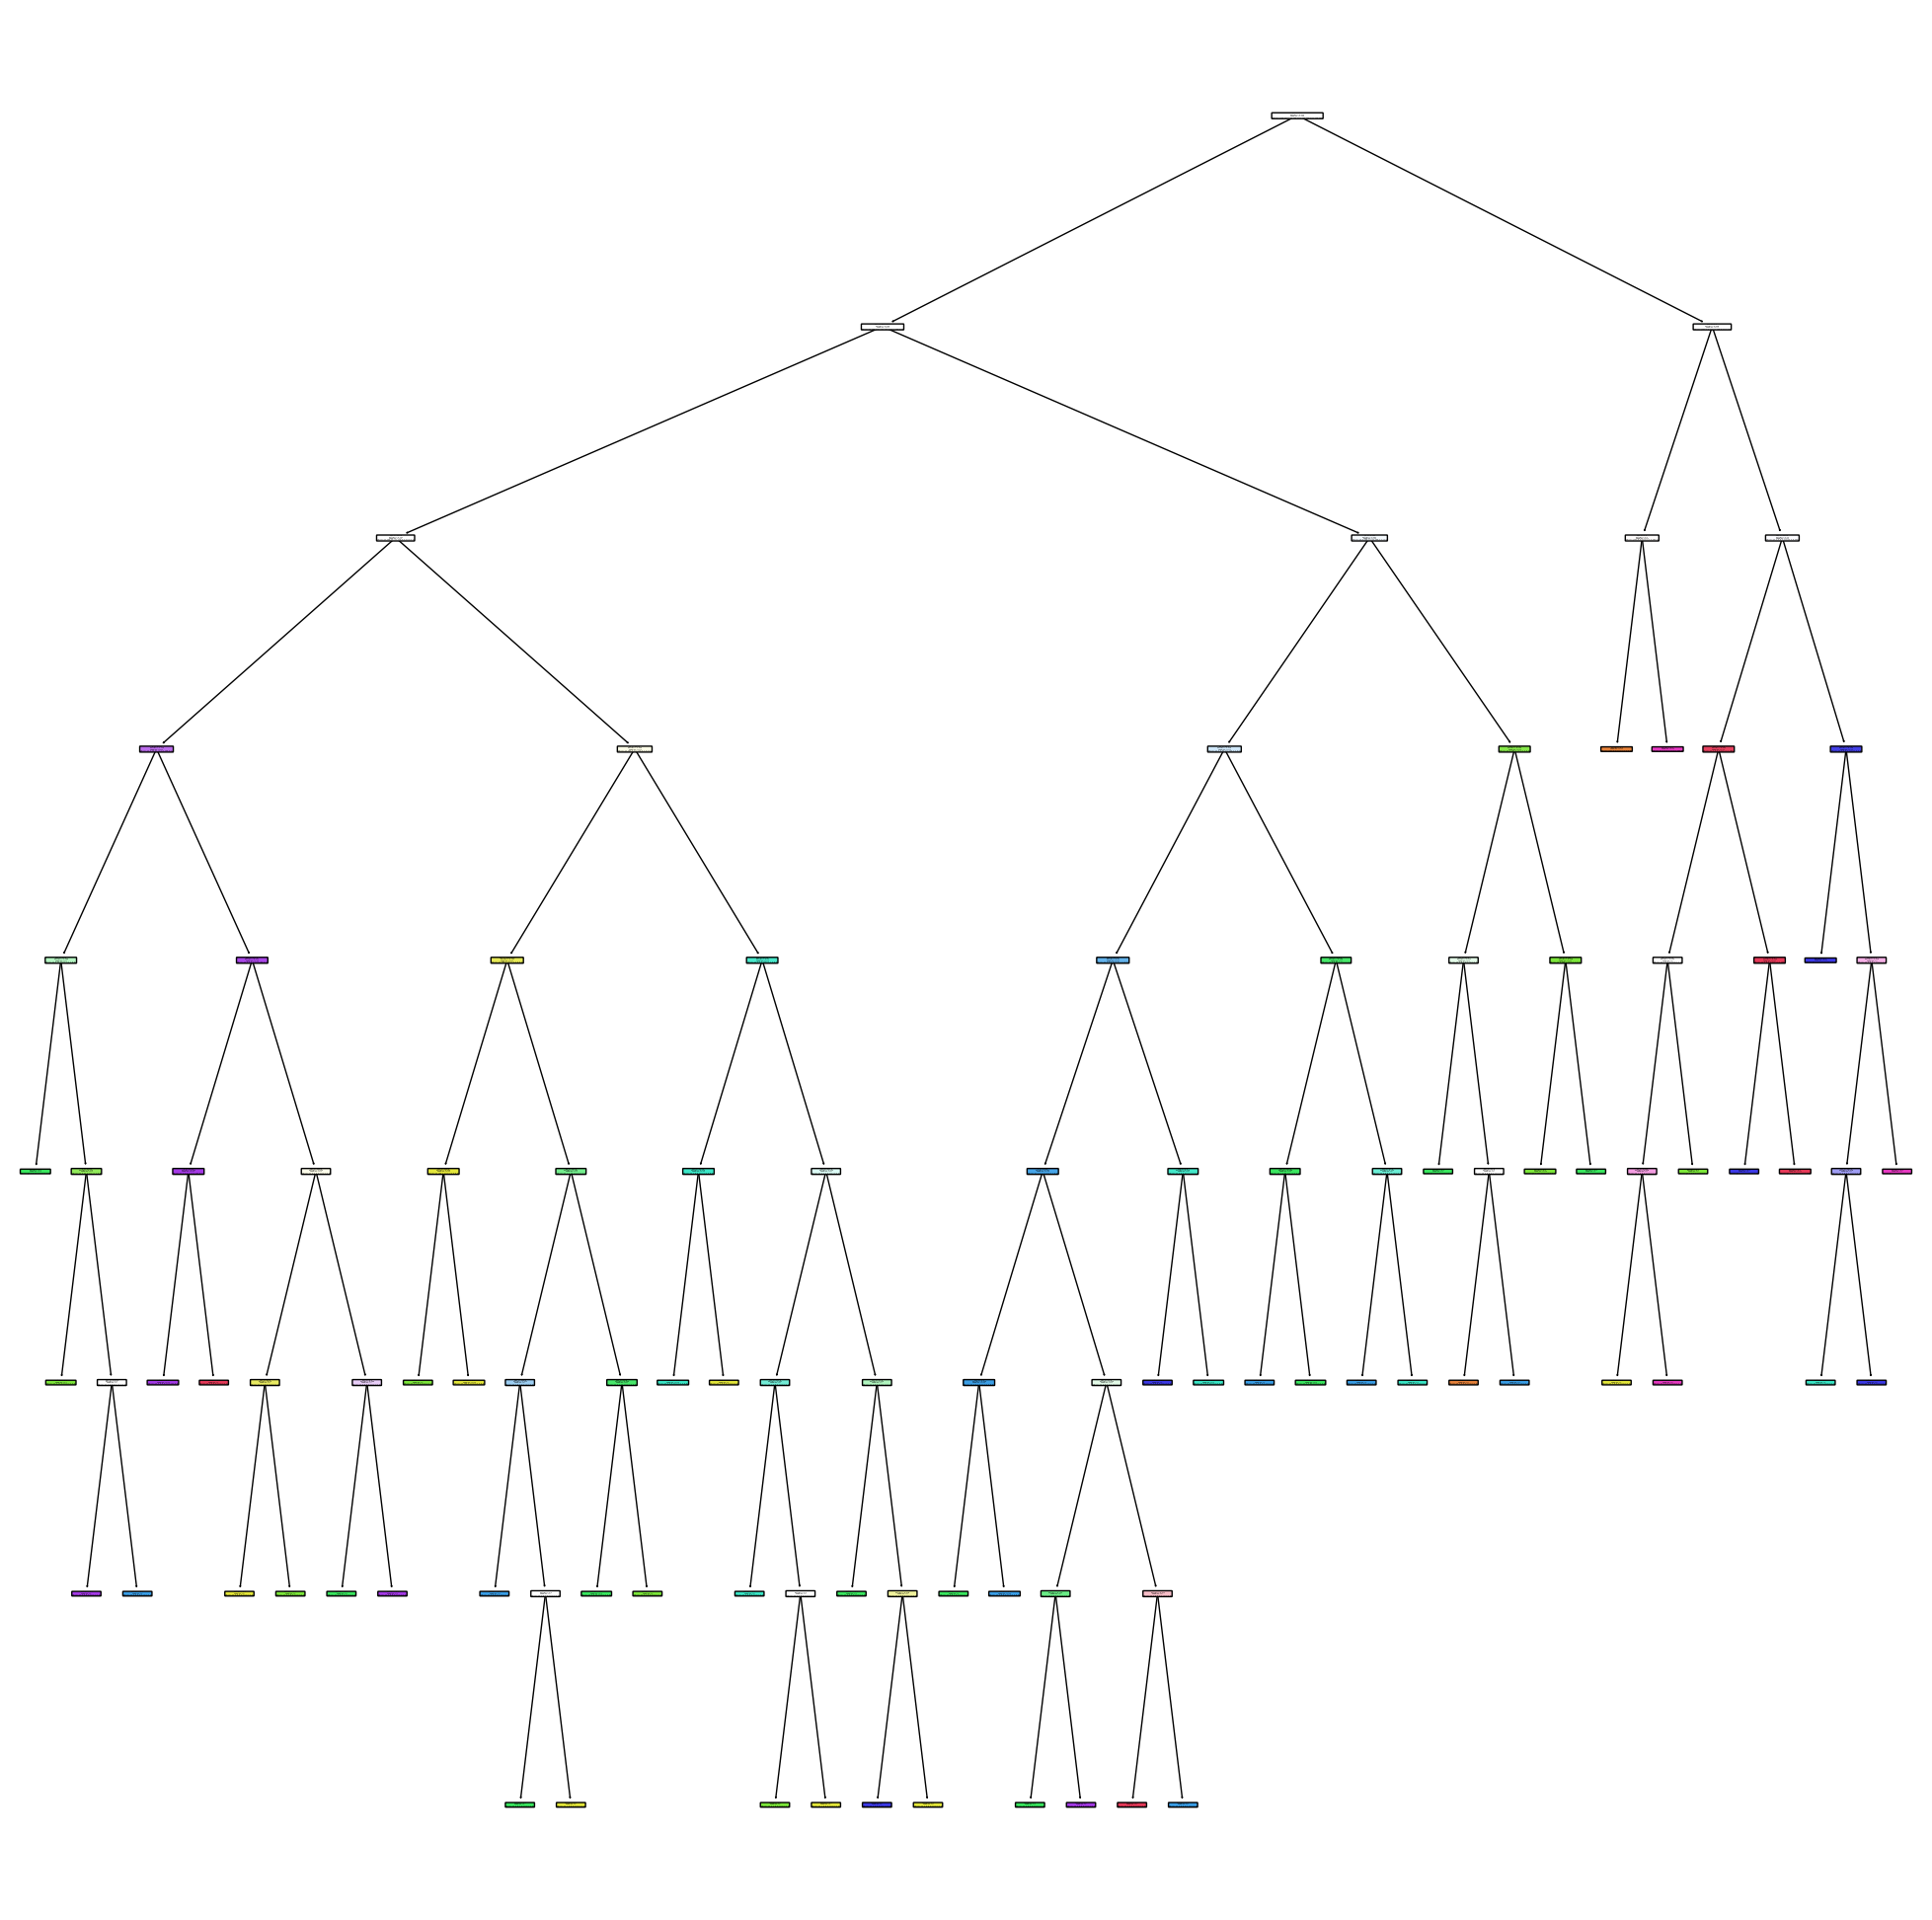

In [41]:
 
# As dataset is trained as 'x_train' for training and the target variable is 'y_train'
# Create and fit the decision tree model
d_tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
d_tree.fit(x_train, y_train)

# Generate feature names based on the numerical indices
feature_names = [str(i) for i in range(298)]  # Assuming 0 to 297

# Plot the decision 
plt.figure(figsize=(25, 25))  # Adjust the figure size as needed
plot_tree(d_tree, filled=True, rounded=True, feature_names=feature_names)
plt.show()


In [42]:

precision_score(y_test, d_tree_test_pred, average='weighted')  # Calculate precision score with weighted averaging


0.9313156916010092

In [43]:

recall_score(y_test, d_tree_test_pred, average='weighted')  # Calculate recall score with weighted averaging


0.9283333333333333

In [44]:

f1_score(y_test, d_tree_test_pred, average='weighted')  # Calculate F1 score with weighted averaging


0.92849176576392

In [45]:

print(accuracy_score(y_test,d_tree_test_pred)) # Test accuracy

0.9283333333333333


In [46]:

# Decision Tree Metrics
d_tree_precision = precision_score(y_test, d_tree_test_pred, average='weighted')
d_tree_recall = recall_score(y_test, d_tree_test_pred, average='weighted')
d_tree_f1 = f1_score(y_test, d_tree_test_pred, average='weighted')
d_tree_train_accuracy = accuracy_score(y_train, d_tree_train_pred)
d_tree_test_accuracy = accuracy_score(y_test, d_tree_test_pred)

# Table Comparison
import pandas as pd

dec_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Test Accuracy'],
    'Decision Tree': [d_tree_precision, d_tree_recall, d_tree_f1, d_tree_test_accuracy]
}

dec_df = pd.DataFrame(dec_data)
print(dec_df)


          Metric  Decision Tree
0      Precision       0.931316
1         Recall       0.928333
2       F1 Score       0.928492
3  Test Accuracy       0.928333


# Random Forest

In [47]:
rf_c = RandomForestClassifier()  # Initialize a RandomForestClassifier
rf_c.fit(x_train, y_train)  # Train the model on the training set
rf_test_pred = rf_c.predict(x_test)  # Make predictions on the test set
rf_train_pred = rf_c.predict(x_train)  # Make predictions on the training set


<Figure size 600x400 with 0 Axes>

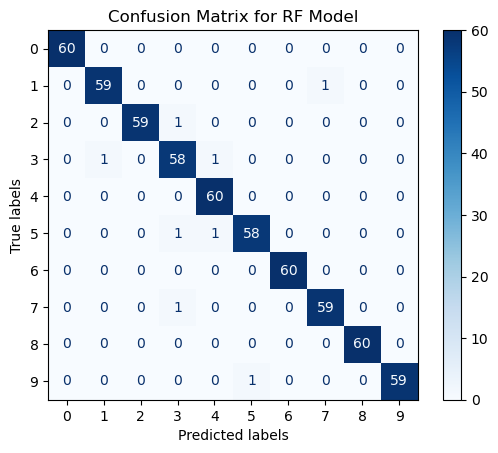

In [48]:

# As y_test and y_pred_knn are true and predicted labels
# Calculate confusion matrix
cm = confusion_matrix(y_test, rf_test_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RF Model')
plt.show()

In [49]:

precision_score(y_test, rf_test_pred, average='weighted')  # Calculate precision score with weighted averaging


0.9868279121739312

In [50]:

recall_score(y_test, rf_test_pred, average='weighted')  # Calculate recall score with weighted averaging


0.9866666666666667

In [51]:

f1_score(y_test, rf_test_pred, average='weighted')  # Calculate F1 score with weighted averaging


0.9866934103271439

In [52]:

print('Test Score:', accuracy_score(y_test, rf_test_pred))  # Print the accuracy score on the test set


Test Score: 0.9866666666666667


In [53]:
# Calculate Metrics for Random Forest
rf_precision = precision_score(y_test, rf_test_pred, average='weighted')
rf_recall = recall_score(y_test, rf_test_pred, average='weighted')
rf_f1 = f1_score(y_test, rf_test_pred, average='weighted')
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)
rf_train_accuracy = accuracy_score(y_train, rf_train_pred)

# Table Comparison
ran_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Test Accuracy'],
    'Random Forest': [rf_precision, rf_recall, rf_f1, rf_test_accuracy]
}

ran_df = pd.DataFrame(ran_data)
print(ran_df)

          Metric  Random Forest
0      Precision       0.986828
1         Recall       0.986667
2       F1 Score       0.986693
3  Test Accuracy       0.986667


# SVM

In [54]:

# Define the parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['poly', 'sigmoid'], 'degree': [2, 3, 4]}

# Create an SVM classifier
svc = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['poly', 'sigmoid']})

In [55]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Make predictions on the test set using the best model
best_svc = grid_search.best_estimator_
svc_test_pred = best_svc.predict(x_test)

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, svc_test_pred)
print(f"Accuracy on test set: {accuracy_test:.2f}")


Best Parameters: {'C': 100, 'degree': 3, 'kernel': 'poly'}
Accuracy on test set: 0.97


In [56]:
# Calculate Metrics for Support Vector Machine
svc_precision = precision_score(y_test, svc_test_pred, average='weighted')
svc_recall = recall_score(y_test, svc_test_pred, average='weighted')
svc_f1 = f1_score(y_test, svc_test_pred, average='weighted')
svc_test_accuracy = accuracy_score(y_test, svc_test_pred)

# Table Comparison
svc_data = {
    'Metric': ['Precision', 'Recall', 'F1 Score', 'Test Accuracy'],
    'Support Vector Classifier': [svc_precision, svc_recall, svc_f1, svc_test_accuracy]
}

svc_df = pd.DataFrame(svc_data)
print(svc_df)


          Metric  Support Vector Classifier
0      Precision                   0.968494
1         Recall                   0.968333
2       F1 Score                   0.968374
3  Test Accuracy                   0.968333


In [57]:

classifiers = {'Logistic Regression': logreg,
               'Decision Tree': d_tree,
               'Random Forest': rf_c,
               'SVM': best_svc}

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall','F1 Score'])

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(x_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract precision, recall, and F1 score for each class
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    
    # Add results to the DataFrame
    results_df = results_df.append({'Classifier': clf_name,
                                    'Accuracy': accuracy,
                                    'Precision': precision,
                                    'Recall': recall,
                                    'F1 Score': f1},
                                   ignore_index=True)

# Print the results DataFrame
print(results_df)


            Classifier  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.946667   0.947499  0.946667  0.946364
1        Decision Tree  0.933333   0.934678  0.933333  0.933510
2        Random Forest  0.983333   0.983593  0.983333  0.983316
3                  SVM  0.968333   0.968494  0.968333  0.968374


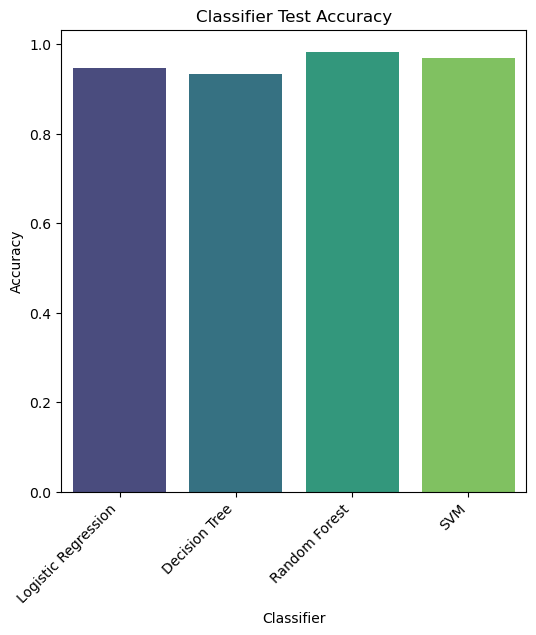

In [58]:

# Plot the test accuracy for each classifier
plt.figure(figsize=(6, 6))
sns.barplot(x='Classifier', y='Accuracy', data=results_df, palette='viridis')
plt.title('Classifier Test Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


Conclusion :

To conclude our observations,

1)Logistic regression yielded better results

2)The concept of regularization increased the performance of upto 3.5%

3)Decision trees also yielded good results 

4)Also Random forest yielded best results since it is an ensemble method by itself

5)SVM is also a good model for this data set

6)Finally we tried identifying binary images as digits(0-9) from the attributes data and the good model to predict this is nothing but "Random Forest"

